# Create the train and test dataset

In [49]:
from data import train
from data import categorical, numerical

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X=train.drop('sales', axis=1)

In [180]:
y=train.sales

# Perform KNN (SALES) with Cross Validation

In [206]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.metrics import mean_squared_error as MSE 
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [207]:
MSEval = []
def KNN_MSE(k):
    k=k+1
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5,scoring='neg_mean_squared_error')
    MSEval.append(-scores.mean())

In [208]:
for k in range(10):
    KNN_MSE(k)

<AxesSubplot:>

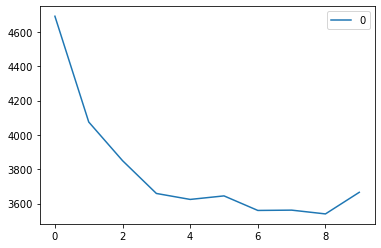

In [209]:
curve = pd.DataFrame(MSEval)
curve.plot()

In [210]:
min(MSEval)

3539.8841925366805

In [211]:
MSEval.index(3539.8841925366805)

8

In [177]:
# doesnt tally with graph because graph is index
print("Best k value is 9 and rmse value is 3539.8841925366805")

Best k value is 9 and rmse value is 3539.8841925366805


# Perform KNN (Log SALES)

In [212]:
y_log = np.log(y)

In [213]:
MSEvalS = []
def KNN_MSES(k):
    k=k+1
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X, y_log, cv=5,scoring='neg_mean_squared_error')
    MSEvalS.append(-scores.mean())

In [214]:
for k in range(10):
    KNN_MSES(k)

<AxesSubplot:>

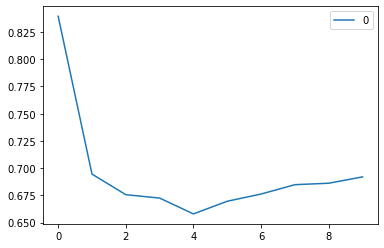

In [215]:
curve = pd.DataFrame(MSEvalS)
curve.plot()

In [216]:
min(MSEvalS)

0.6579148962198568

# Perform KNN (Log Sales and predictors)

In [191]:
trainlog=train.copy()

In [192]:
trainlog.head()

,attribute2,clickVolume,avgOriginalUnitPrice,avgFinalUnitPrice,ma14SalesVolume,meanAge,gender,meanEducation,maritalStatus,plus,...,attribute1_2.0,attribute1_3.0,attribute1_4.0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7
1404,4.850075,3.082306,4.281904,3.791205,6.480146,7.813408,1.380382,11.580054,2.201123,1.650476,...,0,1,0,0,0,0,0,1,0,0
2184,2.910045,0.094506,1.709888,1.637009,0.059201,7.600842,0.000000,10.896544,1.410243,1.856786,...,0,1,0,0,0,0,0,0,1,0
796,4.850075,0.217541,0.994800,1.103595,0.193577,7.016162,0.849466,11.865126,0.987170,0.866500,...,0,1,0,0,0,0,0,0,1,0
25,3.880060,0.327738,1.566200,1.306937,0.509315,6.876952,0.000000,10.805739,1.645284,1.624688,...,0,1,0,0,0,1,0,0,0,0
1745,4.850075,0.389791,2.506703,2.351882,0.265934,8.667627,1.162427,11.653248,3.117380,1.476989,...,0,1,0,0,0,1,0,0,0,0


In [193]:
len(trainlog)

1992

In [194]:
# only log numerical predictors
print(numerical)

['attribute2', 'clickVolume', 'avgOriginalUnitPrice', 'avgFinalUnitPrice', 'ma14SalesVolume', 'meanAge', 'gender', 'meanEducation', 'maritalStatus', 'plus', 'meanPurchasePower', 'meanUserLevel', 'meanCityLevel']


In [195]:
for c in numerical:
    trainlog[c] = np.log10(trainlog[c])

C:\Users\aaron\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [196]:
trainlog.head()

,attribute2,clickVolume,avgOriginalUnitPrice,avgFinalUnitPrice,ma14SalesVolume,meanAge,gender,meanEducation,maritalStatus,plus,...,attribute1_2.0,attribute1_3.0,attribute1_4.0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7
1404,0.685748,0.488876,0.631637,0.578777,0.811585,0.892841,0.139999,1.063711,0.342644,0.217609,...,0,1,0,0,0,0,0,1,0,0
2184,0.463900,-1.024543,0.232968,0.214051,-1.227672,0.880862,-inf,1.037289,0.149294,0.268762,...,0,1,0,0,0,0,0,0,1,0
796,0.685748,-0.662459,-0.002264,0.042810,-0.713145,0.846100,-0.070854,1.074272,-0.005608,-0.062231,...,0,1,0,0,0,0,0,0,1,0
25,0.588838,-0.484473,0.194847,0.116255,-0.293013,0.837396,-inf,1.033654,0.216241,0.210770,...,0,1,0,0,0,1,0,0,0,0
1745,0.685748,-0.409169,0.399103,0.371416,-0.575226,0.937900,0.065366,1.066447,0.493790,0.169377,...,0,1,0,0,0,1,0,0,0,0


In [199]:
trainlog = trainlog.replace([np.inf, -np.inf], np.nan)

In [200]:
trainlog.head()

,attribute2,clickVolume,avgOriginalUnitPrice,avgFinalUnitPrice,ma14SalesVolume,meanAge,gender,meanEducation,maritalStatus,plus,...,attribute1_2.0,attribute1_3.0,attribute1_4.0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7
1404,0.685748,0.488876,0.631637,0.578777,0.811585,0.892841,0.139999,1.063711,0.342644,0.217609,...,0,1,0,0,0,0,0,1,0,0
2184,0.463900,-1.024543,0.232968,0.214051,-1.227672,0.880862,NaN,1.037289,0.149294,0.268762,...,0,1,0,0,0,0,0,0,1,0
796,0.685748,-0.662459,-0.002264,0.042810,-0.713145,0.846100,-0.070854,1.074272,-0.005608,-0.062231,...,0,1,0,0,0,0,0,0,1,0
25,0.588838,-0.484473,0.194847,0.116255,-0.293013,0.837396,NaN,1.033654,0.216241,0.210770,...,0,1,0,0,0,1,0,0,0,0
1745,0.685748,-0.409169,0.399103,0.371416,-0.575226,0.937900,0.065366,1.066447,0.493790,0.169377,...,0,1,0,0,0,1,0,0,0,0


In [201]:
trainlog.dropna()

,attribute2,clickVolume,avgOriginalUnitPrice,avgFinalUnitPrice,ma14SalesVolume,meanAge,gender,meanEducation,maritalStatus,plus,...,attribute1_2.0,attribute1_3.0,attribute1_4.0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7
1404,0.685748,0.488876,0.631637,0.578777,0.811585,0.892841,0.139999,1.063711,0.342644,0.217609,...,0,1,0,0,0,0,0,1,0,0
796,0.685748,-0.662459,-0.002264,0.042810,-0.713145,0.846100,-0.070854,1.074272,-0.005608,-0.062231,...,0,1,0,0,0,0,0,0,1,0
1745,0.685748,-0.409169,0.399103,0.371416,-0.575226,0.937900,0.065366,1.066447,0.493790,0.169377,...,0,1,0,0,0,1,0,0,0,0
1452,0.685748,0.434679,0.407841,0.426777,0.424927,0.908890,0.258407,1.079412,0.456406,0.347608,...,0,1,0,0,0,1,0,0,0,0
1623,0.463900,-0.610832,-0.003730,-0.003312,-0.060871,0.937180,0.473214,1.093240,0.313151,0.210770,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,0.463900,-0.828695,-0.020654,-0.009627,-0.311845,0.801680,0.441029,1.007326,0.170483,0.268762,...,1,0,0,0,0,0,1,0,0,0
1814,0.530847,-0.087006,0.049515,0.009433,-0.068927,0.918731,0.117335,1.023716,0.392332,0.028148,...,1,0,0,0,0,0,0,0,0,1
1428,0.588838,-1.113335,0.059967,0.066176,-0.115855,1.005800,0.264938,1.145628,0.693362,0.636739,...,0,1,0,0,0,0,0,1,0,0
2441,0.588838,-0.465518,0.055048,0.098918,-0.567620,0.937767,-0.081849,1.042088,0.568423,-0.141413,...,0,1,0,0,1,0,0,0,0,0


In [202]:
Xlogpred = trainlog.drop('sales', axis=1)

In [203]:
ylogpred = trainlog.sales
ylogpred = np.log(ylogpred)

In [218]:
MSEvallog = []
def KNN_MSElog(k):
    k=k+1
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, Xlogpred, ylogpred, cv=5,scoring='neg_mean_squared_error')
    MSEvallog.append(-scores.mean())

In [219]:
for k in range(10):
    KNN_MSElog(k)

rning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aaron\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aaron\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1107, in fit
    X, y = self._validate_data(X, y, accept_sparse="csr",
  File "C:\Users\aaron\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\aaron\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\aaron\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 795, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  File "C:\Users\aaron\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f

<AxesSubplot:>

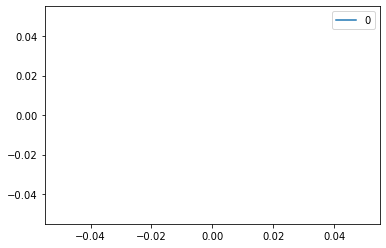

In [221]:
curve = pd.DataFrame(MSEvallog)
curve.plot()

In [223]:
min(MSEvallog)

nan